In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotting_tools as pt
%matplotlib inline

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import kcorrect

cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
kcorrect.load_templates()
kcorrect.load_filters()

def sdss_kcorrect(magnitude_array):
    """kcorrect routine created by Calum Murray"""
    maggies = np.array(pow(10,-0.4*row[2:7]))
    invar = pow(0.4*math.log(10)*maggies*np.array(row[7:12]),-2) 
    k_tuple = np.concatenate(([row[1]],maggies,invar))
    kcorrect_tuple = kcorrect.fit_coeffs(k_tuple)
    k_coeff = kcorrect.reconstruct_maggies(kcorrect_tuple)
    final_input = maggies/np.array(k_coeff[1:])
    kcorrection_array = [-2.5*math.log(row,10) for row in final_input]

In [2]:
# same rows: 0 u, 1 r, 2 mr_petro, 3 z, 4 petroR50_r
mw = np.load('/home/calum/Documents/Mphys_data/cat_check/all_mw_colours.npy')
mgs = np.load('/home/calum/Documents/Mphys_data/cat_check/all_mgs_colours.npy')
final_mgs = np.load('/home/calum/Documents/Mphys_data/mgs_multiwavelength/init_mgs_multiwavelength.npy')

In [3]:
x = [float(row[1])-5*(np.log10(cosmo.luminosity_distance(row[3]).to(u.pc).value/10)) for row in mw]
y = [row[0]-row[1] for row in mw]

(-24, -16)

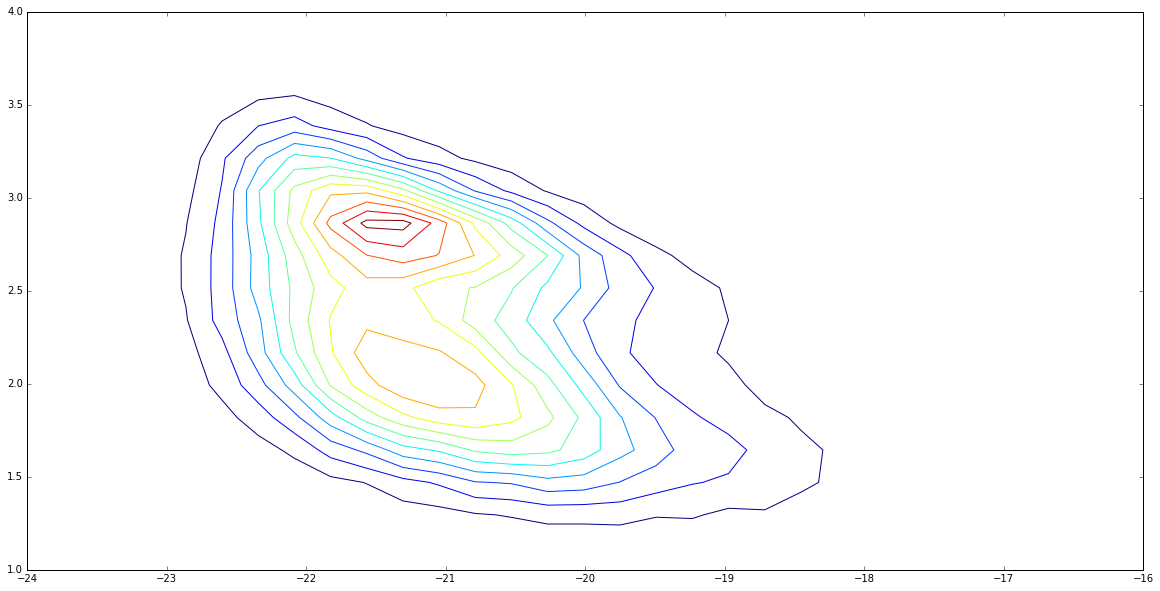

In [4]:
plt.figure(figsize=(20,10))
pt.plot_contour(x,y,bins=150,lines=15)
plt.ylim(1,4)
plt.xlim(-24,-16)

In [5]:
mgs_x = [float(row[1])-5*(np.log10(cosmo.luminosity_distance(row[3]).to(u.pc).value/10)) for row in mgs]
mgs_y = [row[0]-row[1] for row in mgs]

In [6]:
zlim_mgs = [row for row in mgs if row[3] < 0.08 and row[3] > 0.004 ]
zlim_mgs_x = [float(row[1])-5*(np.log10(cosmo.luminosity_distance(row[3]).to(u.pc).value/10)) for row in zlim_mgs]
zlim_mgs_y = [row[0]-row[1] for row in zlim_mgs]

(-24, -16)

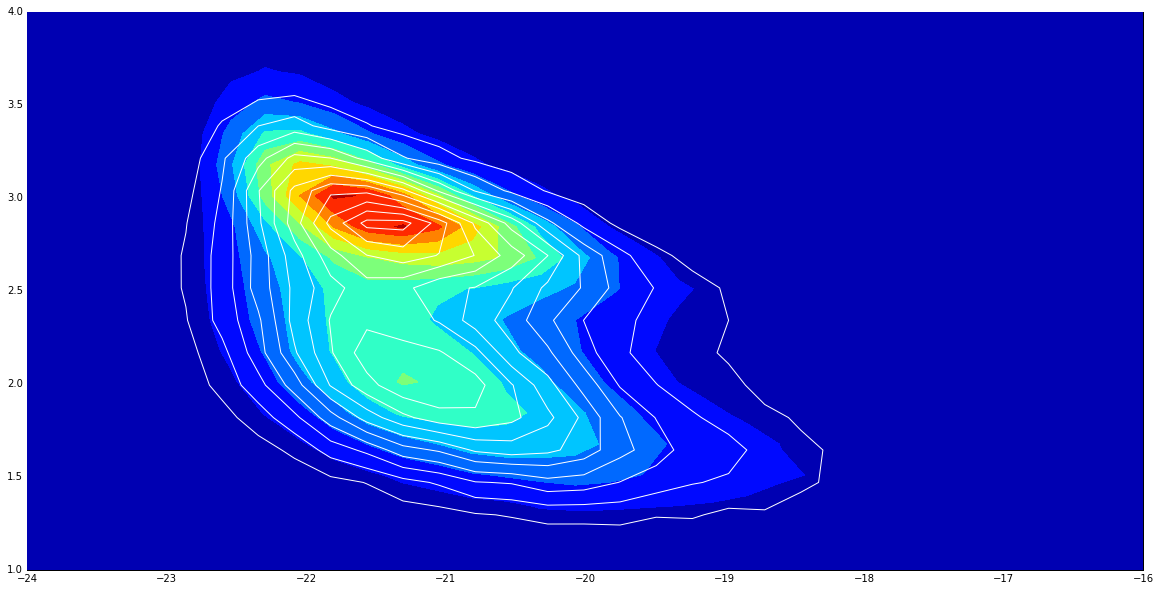

In [9]:
plt.figure(figsize=(20,10))
pt.plot_contour(mgs_x,mgs_y,bins=200,lines=10, fill=True)
pt.plot_contour(x,y,bins=150,lines=15,colours='w')
plt.ylim(1,4)
plt.xlim(-24,-16)

(-24, -16)

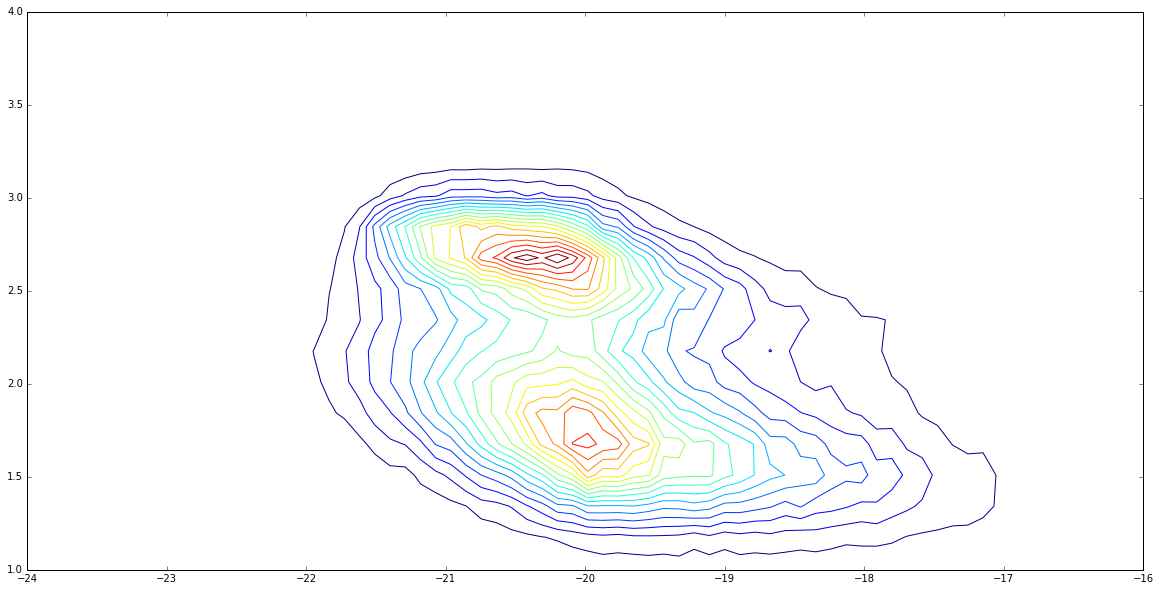

In [10]:
plt.figure(figsize=(20,10))
pt.plot_contour(zlim_mgs_x,zlim_mgs_y,bins=200)
plt.ylim(1,4)
plt.xlim(-24,-16)

(-24, -16)

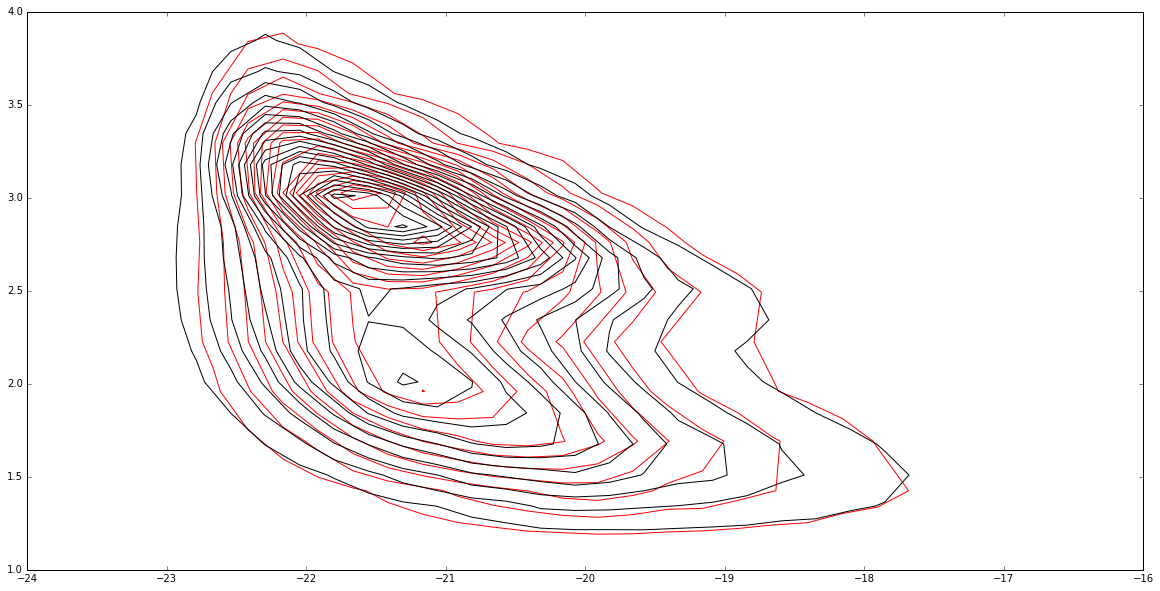

In [11]:
# this is the kcorrected mgs
plt.figure(figsize=(20,10))
pt.plot_contour([row[2] for row in final_mgs],[row[3] for row in final_mgs],bins=200,colours='r')
pt.plot_contour(mgs_x,mgs_y,bins=200,colours='k')
plt.ylim(1,4)
plt.xlim(-24,-16)

In [12]:
# upper redshifts
uzlim_mgs = [row for row in mgs if row[3] > 0.1 ]
uzlim_mgs_x = [float(row[1])-5*(np.log10(cosmo.luminosity_distance(row[3]).to(u.pc).value/10)) for row in uzlim_mgs]
uzlim_mgs_y = [row[0]-row[1] for row in uzlim_mgs]

In [13]:
# lower redshifts
lzlim_mgs = [row for row in mgs if row[3] < 0.06 and row[3] > 0.004 ]
lzlim_mgs_x = [float(row[1])-5*(np.log10(cosmo.luminosity_distance(row[3]).to(u.pc).value/10)) for row in lzlim_mgs]
lzlim_mgs_y = [row[0]-row[1] for row in lzlim_mgs]

In [14]:
# medium redshifts
mzlim_mgs = [row for row in mgs if row[3] > 0.06 and row[3] <0.1 ]
mzlim_mgs_x = [float(row[1])-5*(np.log10(cosmo.luminosity_distance(row[3]).to(u.pc).value/10)) for row in mzlim_mgs]
mzlim_mgs_y = [row[0]-row[1] for row in mzlim_mgs]

In [15]:
# lowest redshifts
bzlim_mgs = [row for row in mgs if row[3] <0.004 ]
bzlim_mgs_x = [float(row[1])-5*(np.log10(cosmo.luminosity_distance(row[3]).to(u.pc).value/10)) for row in bzlim_mgs]
bzlim_mgs_y = [row[0]-row[1] for row in bzlim_mgs]

(99251, 300116, 177700, 3249, 580316)

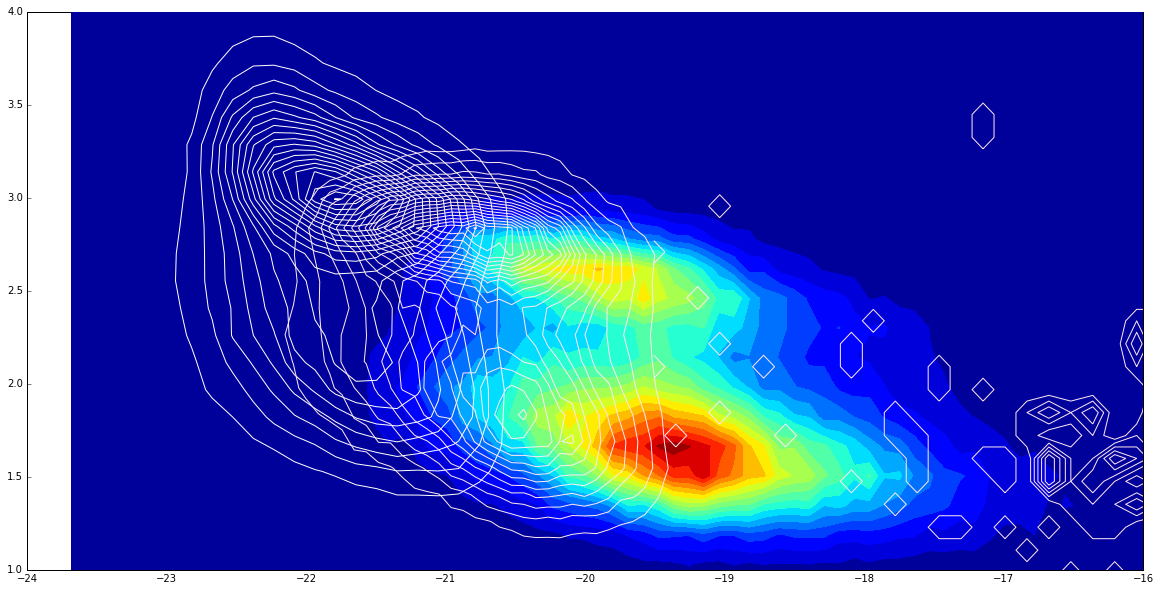

In [19]:
plt.figure(figsize=(20,10))
pt.plot_contour(lzlim_mgs_x,lzlim_mgs_y,bins=200, fill=True)
pt.plot_contour(uzlim_mgs_x,uzlim_mgs_y,bins=200, colours='w')
pt.plot_contour(mzlim_mgs_x,mzlim_mgs_y,bins=200, colours='#ffe9f2')
pt.plot_contour(bzlim_mgs_x,bzlim_mgs_y,bins=200, colours='#ffe6f2')
plt.ylim(1,4)
plt.xlim(-24,-16)
len(lzlim_mgs),len(uzlim_mgs),len(mzlim_mgs),len(bzlim_mgs), len(lzlim_mgs)+len(uzlim_mgs)+len(mzlim_mgs)+len(bzlim_mgs)